# Data Pre-processing 

## Centering and Scaling

The new variables $\hat{x}$ are defined as

$\hat{x} := \frac{x - \bar{x}}{x^{*}}$

where $\bar{x}$ is the mean and $x^{*}$ is the sd. 

In [1]:
source("helpers.r")
library(caret)

df <- get_training_df_clean()

arg <- preProcess(df, method=c("center", "scale"))
df_processed <- predict(arg, df)

print("Initial")
mean(df$chol)
sd(df$chol)

print("Centered and Scaled")
mean(df_processed$chol)
sd(df_processed$chol)

Warning message:
"package 'tidyverse' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.1"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'MLmetrics' was built under R version 3.6.1"
Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is 

[1] "Initial"


[1] 247.0837

[1] 51.79526

[1] "Centered and Scaled"


[1] -2.590409e-16

[1] 1

Notice the nummerical zero ;) Always fit on the training set and predict on the test set. The set set does not necessary have mean 0 and sd 1.

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


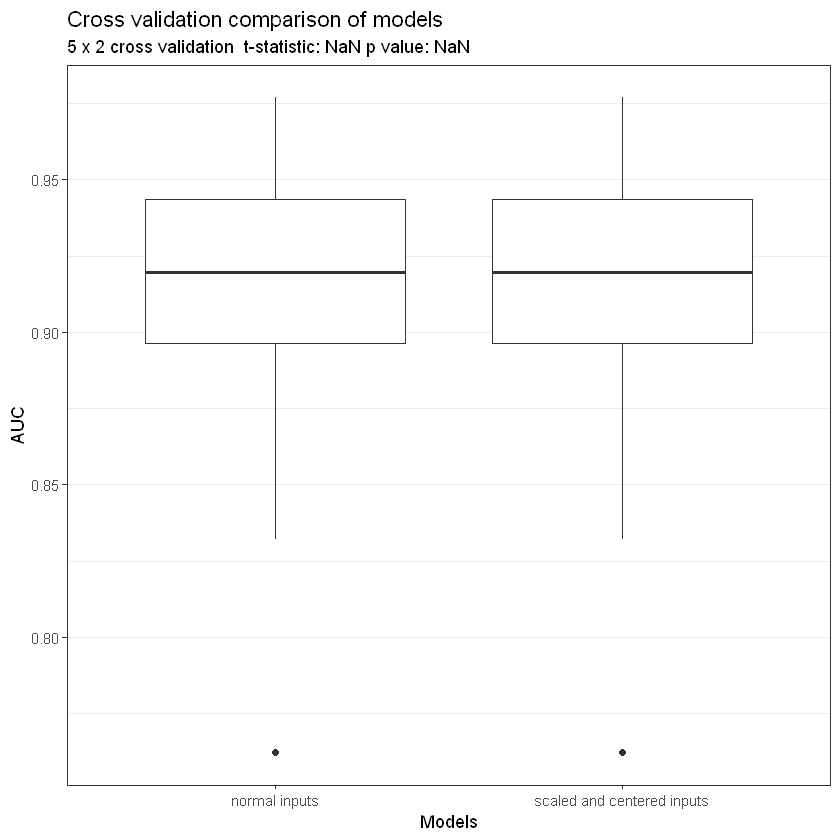

In [2]:
rm(list = ls())
source("helpers.r")

learner_A <- function(training, test) {
  name <- "normal inputs"

  fit <- glm(target ~ ., data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "scaled and centered inputs"
    
  arg <- preProcess(training, method=c("center", "scale"))
  training <- predict(arg, training)
  test  <- predict(arg, test)
  
  fit <- glm(target ~ ., data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)

plot_result(result)

Ups we receive the same results. In fact for the prediction there is no difference in logistic regression whether you scale and center the variables or not:

In [3]:
rm(list = ls())
source("helpers.r")

df <- get_training_df_clean()
fit <- glm(target ~ ., data=df , family =binomial(link = "logit"))
y_probabilities <- predict(fit, df ,  type="response")


df <- get_training_df_clean()
arg <- preProcess(df, method=c("center", "scale"))
df  <- predict(arg, df)
fit <- glm(target ~ ., data=df , family =binomial(link = "logit"))
y_probabilities_scaled <- predict(fit, df ,  type="response")

compare_probs <- tibble(y_probabilities, y_probabilities_scaled)
head(compare_probs)
sum(abs(y_probabilities - y_probabilities_scaled))

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


y_probabilities,y_probabilities_scaled
0.7606738,0.7606738
0.9680976,0.9680976
0.9684294,0.9684294
0.8995777,0.8995777
0.8012921,0.8012921
0.8758098,0.8758098


[1] 2.303897e-14